
<h1 style="text-align:center;">Minerando Dados </h1>
<h2 style="text-align:center;"> Árvore de Decisão na prática</h2>


 <img src="tabela.png" width="500" height="400" align="center"/>,     
<img src="tree.png" width="600" height="500" align="center"/>


# Construção da Árvode
- Começa no top node e se baseia no índice de information gain para determinar a melhor divisão 
- Realiza loop para verificar melhor feature e threshold para realizar a divisão
- determina melhor feature e melhor threshold para divisão
- Constroi a Árvore de forma recursiva 
- Determinar critério para determinar até quando (onde) a árvode cresce


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_df(file_path):
    index_col = 0
    # Leitura do csv file pulando primeira coluna
    df = pd.read_csv(file_path, index_col = index_col)
    #seleciona somente valores não nulos
    df = df[df['Y'].notnull()]
    return df

In [4]:
file_path = 'car_information.csv'
df = read_df(file_path)
df.head(4)

,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
0,ford,31900,hatch,ka,manual,2015,39869,1,flex,elétrica,preto,sim,ka 1.0 se se plus tivct flex 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar co...",1.0
1,vwvolkswagen,26000,passeio,gol,manual,2013,109000,1.6,flex,hidráulica,prata,sim,gol 1.6 mi plus total flex 8v 4p,4 portas,0,"vidro elétrico, trava elétrica, ar condicionad...",1.0
0,vwvolkswagen,43990,hatch,fox,manual,2017,53000,1.6,flex,elétrica,branco,sim,fox pepper 1.6 flex 16v 5p,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar co...",0.0
3,ford,23900,0,fiesta,manual,2013,70000,1,flex,hidráulica,preto,sim,fiesta class 1.0 4p,4 portas,ipva pago,0,1.0


# Explorando o dataframe

In [5]:
# verificar shape do dataset
df.shape

(4554, 17)

In [6]:
df.dtypes

brand            object
price             int64
cartype          object
model            object
gearbox          object
regdate           int64
mileage           int64
motorpower       object
fuel             object
car_steering     object
carcolor         object
exchange         object
version          object
doors            object
financial        object
extra            object
Y               float64
dtype: object

In [7]:
# Verificar valores na
df.isna().sum()

brand           0
price           0
cartype         0
model           0
gearbox         0
regdate         0
mileage         0
motorpower      0
fuel            0
car_steering    0
carcolor        0
exchange        0
version         0
doors           0
financial       0
extra           0
Y               0
dtype: int64

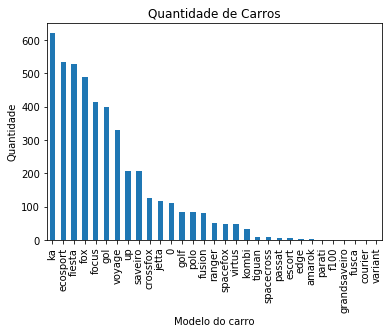

In [9]:
df.model.value_counts().plot(kind='bar', xlabel = 'Modelo do carro', ylabel ='Quantidade', title = 'Quantidade de Carros')

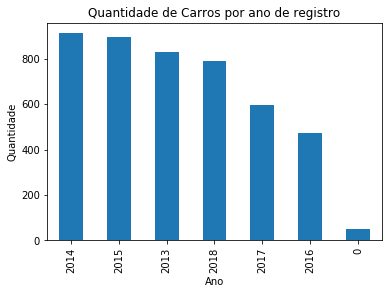

In [10]:
df.regdate.value_counts().plot(kind='bar', xlabel = 'Ano', ylabel ='Quantidade', title = 'Quantidade de Carros por ano de registro')

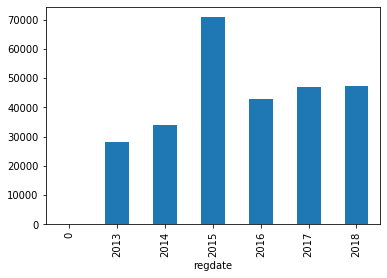

In [11]:
df.groupby('regdate').mean()['price'].plot(kind='bar')

In [12]:
df.groupby('regdate').max()

,brand,price,cartype,model,gearbox,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
regdate,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2013,vwvolkswagen,75000,vanutilitário,voyage,semiautomático,51000000,3.03.9,flex,mecnica,vermelho,sim,voyage trendline 1.6 t.flex 8v 4p,4 portas,ipva pago,"vidro elétrico, trava elétrica, direção hidráu...",1.0
2014,vwvolkswagen,110000,vanutilitário,voyage,semiautomático,9999999999,4.0oumais,flex,mecnica,vermelho,sim,voyage trendline 1.6 t.flex 8v 4p,4 portas,ipva pago,"vidro elétrico, trava elétrica, direção hidráu...",1.0
2015,vwvolkswagen,29900000,vanutilitário,voyage,semiautomático,76800000,2.02.9,flex,mecnica,vermelho,sim,voyage trendline 1.6 t.flex 8v 4p,4 portas,ipva pago,"vidro elétrico, trava elétrica, ar condicionad...",1.0
2016,vwvolkswagen,102999,vanutilitário,voyage,semiautomático,66000000,2.02.9,flex,mecnica,vermelho,sim,voyage trendline 1.6 t.flex 8v 4p,4 portas,ipva pago,"vidro elétrico, trava elétrica, ar condicionad...",1.0
2017,vwvolkswagen,400000,vanutilitário,voyage,semiautomático,72000000,2.02.9,flex,mecnica,vermelho,sim,voyage trendline 1.6 t.flex 8v 4p,4 portas,ipva pago,"vidro elétrico, trava elétrica, ar condicionad...",1.0
2018,vwvolkswagen,154900,vanutilitário,voyage,semiautomático,22000000,2.02.9,flex,mecnica,vermelho,sim,voyage trendline 1.6 t.flex 8v 4p,4 portas,ipva pago,"vidro elétrico, trava elétrica, ar condicionad...",1.0


In [13]:
df.groupby('regdate').min()

,brand,price,cartype,model,gearbox,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
regdate,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2013,ford,5000,0,0,0,0,0,flex,0,0,0,0,0,0,0,0.0
2014,ford,100,0,0,0,0,0,flex,0,0,0,0,0,0,0,0.0
2015,ford,0,0,0,0,0,0,flex,0,0,0,0,0,0,0,0.0
2016,ford,0,0,0,0,0,0,flex,0,0,0,0,0,0,0,0.0
2017,ford,0,0,0,0,0,0,flex,0,0,0,0,0,0,0,0.0
2018,ford,7000,0,0,0,0,0,flex,0,0,0,0,0,0,0,0.0


In [14]:
print('Número de linhas: {}'.format(df[df.price <= 5000].shape[0]))
df[df.price <= 5000].head(3)


Número de linhas: 59


,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [15]:
print('Número de linhas: {}'.format(df[df.price >= 70000].shape[0]))
df[df.price >= 70000].head(2)

Número de linhas: 143


,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
6,ford,75000,0,focus,automático,2018,25000,2.02.9,flex,elétrica,prata,sim,focus tita tita plus 2.0 flex 5p aut.,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar co...",0.0
47,ford,77900,passeio,fusion,automático,2016,46231,2.02.9,flex,hidráulica,preto,sim,0,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar co...",0.0


In [16]:
# seleciona index
index_menor_5k = df[df.price <= 5000].index
index_maior_70k = df[df.price >= 70000].index
index_maior_70k

Int64Index([   6,   47,   72,   85,  155,  192,  260,  327,  343,  352,
            ...
            6229, 6251, 6362, 6365, 6383, 6529, 6564, 6611, 6712, 6737],
           dtype='int64', length=143)

In [18]:
def drop_rows(df, index):
    df.drop(index, inplace =True)  

In [19]:
drop_rows(df,index_menor_5k)
drop_rows(df,index_maior_70k)
df = df.reset_index(drop=True)

In [20]:
df.head(3)

,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
0,ford,31900,hatch,ka,manual,2015,39869,1,flex,elétrica,preto,sim,ka 1.0 se se plus tivct flex 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar co...",1.0
1,vwvolkswagen,26000,passeio,gol,manual,2013,109000,1.6,flex,hidráulica,prata,sim,gol 1.6 mi plus total flex 8v 4p,4 portas,0,"vidro elétrico, trava elétrica, ar condicionad...",1.0
2,vwvolkswagen,43990,hatch,fox,manual,2017,53000,1.6,flex,elétrica,branco,sim,fox pepper 1.6 flex 16v 5p,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar co...",0.0


Mediana do preço: 35900.0
Média do preço: 36866.89613970588



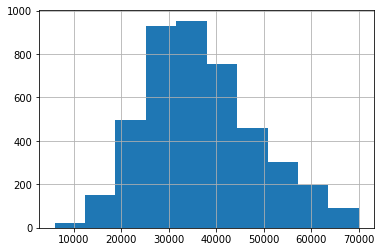

In [21]:
df.price.hist()
print('Mediana do preço:', df.price.median())
print('Média do preço:', df.price.mean())
print()

## Selecionar colunas para modelo 1

In [22]:
cols = ['price','regdate', 'Y']

In [23]:
#df = df.reset_index(drop=True)

In [24]:
# shuffle dataframe
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

In [25]:
simple_df = df[cols]
simple_df.head(2)

,price,regdate,Y
0,58900,2018,0.0
1,59901,2017,0.0


In [26]:
# Separando dados features e target
Y = simple_df['Y']
X = simple_df.loc[:, 'price':'regdate']

In [27]:
# Separa dados de treino e validação
Xtrain, Xval, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=42)
Xtrain.shape, Xval.shape, y_train.shape, y_val.shape

((2176, 2), (2176, 2), (2176,), (2176,))

In [28]:
y_train.value_counts()

0.0    1854
1.0     322
Name: Y, dtype: int64

In [29]:
# Modelo
model = DecisionTreeClassifier(random_state= 42)
model.fit(Xtrain,y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Previsão
pred = model.predict(Xval)

In [32]:
# Importa métricas
from sklearn.metrics import roc_auc_score, average_precision_score

- **roc_auc_score** : Nos informa o quanto o nosso modelo está conseguindo distinguir as classes, ou seja, classificar 1 como 1 e 0 como 0.
- **average_precision_score** : A average precision indica se nosso modelo pode identificar corretamente todos os exemplos positivos sem marcar acidentalmente muitos exemplos negativos como positivos. Portanto, a average precision é alta quando seu modelo pode classificar corretamente os positivos. A average precision é calculada como a área sob uma curva que mede a compensação entre precisão e recall em diferentes limites de decisão

In [33]:
print('average_precision_score :', np.round(average_precision_score(y_val, pred),4))
print('roc_auc_score :', np.round(roc_auc_score(y_val, pred),4))

average_precision_score : 0.2972
roc_auc_score : 0.6562


In [34]:
from sklearn.tree import plot_tree
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


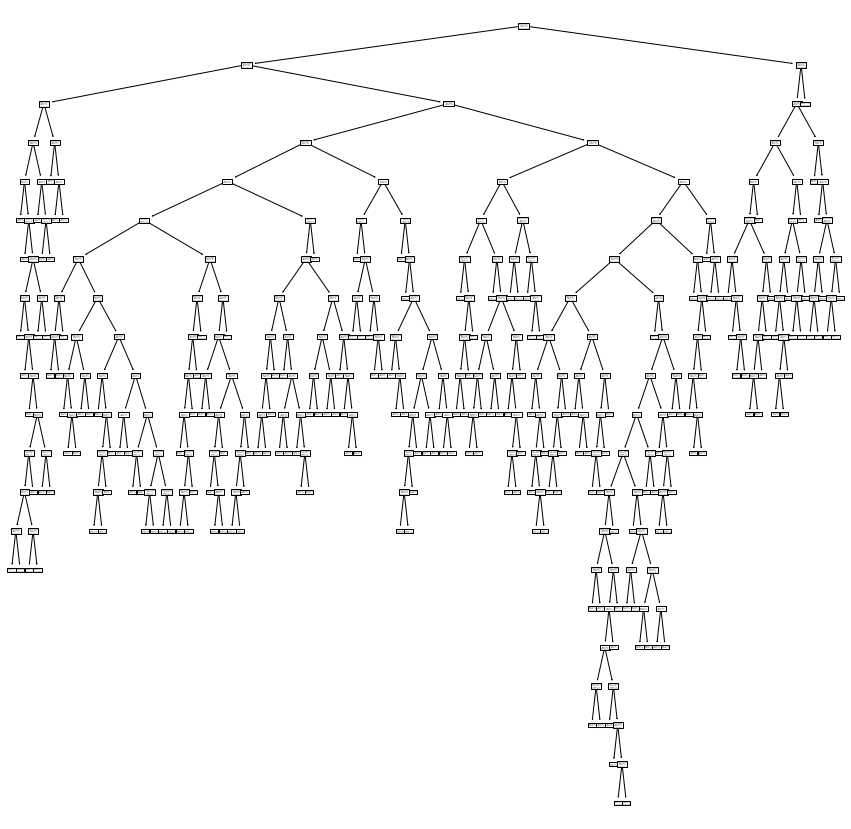

In [35]:
fig,ax = pylab.subplots(1,1, figsize = (15,15))
plot_tree(model , ax = ax, feature_names = Xtrain.columns);

# Estratégia 1 : Adicionar features

In [36]:
file_path = 'car_information.csv'
df = read_df(file_path)
df.head(4)

,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
0,ford,31900,hatch,ka,manual,2015,39869,1,flex,elétrica,preto,sim,ka 1.0 se se plus tivct flex 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar co...",1.0
1,vwvolkswagen,26000,passeio,gol,manual,2013,109000,1.6,flex,hidráulica,prata,sim,gol 1.6 mi plus total flex 8v 4p,4 portas,0,"vidro elétrico, trava elétrica, ar condicionad...",1.0
0,vwvolkswagen,43990,hatch,fox,manual,2017,53000,1.6,flex,elétrica,branco,sim,fox pepper 1.6 flex 16v 5p,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar co...",0.0
3,ford,23900,0,fiesta,manual,2013,70000,1,flex,hidráulica,preto,sim,fiesta class 1.0 4p,4 portas,ipva pago,0,1.0


In [37]:
cols = ['price','regdate','mileage', 'Y']

In [38]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

In [39]:
simple_df = df[cols]
simple_df.head(2)

,price,regdate,mileage,Y
0,38900,2016,46158,0.0
1,39920,2015,0,0.0


In [40]:

# Separando dados features e target
Y = simple_df['Y']
X = simple_df.loc[:, 'price':'mileage']


In [41]:
# Separa dados de treino e validação
Xtrain, Xval, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=42)
Xtrain.shape, Xval.shape, y_train.shape, y_val.shape

((2277, 3), (2277, 3), (2277,), (2277,))

In [42]:
# Modelo
model = DecisionTreeClassifier(random_state= 42)
model.fit(Xtrain,y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# Previsão
pred = model.predict(Xval)

In [44]:
# Importa métricas
from sklearn.metrics import roc_auc_score, average_precision_score
print('average_precision_score :', np.round(average_precision_score(y_val, pred),4))
print('roc_auc_score :', np.round(roc_auc_score(y_val, pred),4))

average_precision_score : 0.3296
roc_auc_score : 0.7158


# Possível estratégia

- Engenharia de features
- Codificar variáveis categóricas
- Adicionar mais features ao modelo

In [45]:
df.head(3)

,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
0,vwvolkswagen,38900,hatch,fox,manual,2016,46158,1.6,flex,hidráulica,branco,sim,fox rock in rio 1.6 mi total flex 8v 5p,4 portas,0,0,0.0
1,ford,39920,passeio,ecosport,automático,2015,0,2.02.9,flex,elétrica,branco,sim,0,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar co...",0.0
2,vwvolkswagen,30000,hatch,gol,manual,2015,41000,1,flex,hidráulica,branco,sim,gol comfortline 1.0 t. flex 8v 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar co...",0.0


# Estratégia 2 : Tuning

## Parametros :
    
- max_depth 
    - Indica o quão profunda a árvore de decisão será
    - Quanto mais profunda a árvore, mais complexo será o modelo (maior número de divisões)
    - Pode impactar significativamente o demolo em termos de overfitting
- min_samples_split
    - Especifica o valor mínimo da amostra necessárias para dividir um node interno 
    - Pode fornecer um número para especificar o valor correto ou um float para expecificar uma fração dos dados
- min_samples_leaf:
    - A folha é um node sem nenhum filho - ou sem divisão
    - min_sample_leaf representa o número mínimo de amostras necessárias em cada folha
    - É similar ao min_sample_split porém, especifica o valor mínimo em cada folha (no final da árvore)
    - Documentação do scikit-learn recomenda começar com min_samples_leaf=5 
    - Documentação do scikit-learn recomenda começar com min_samples_leaf=1 em problemas de classificação com poucas classes
- max_features
    - Representa o número de features serão utilizadas para realizar a divisão dos dados
    - Pode ser passado valor inteiro, float, "sqrt" ( sqrt(features), "log2" e None
    
- creterion
    - A função que irá determinar a qualidade das divisões
    - gini ou entropy

## Bayesian Optimization

In [47]:
from skopt import forest_minimize

In [48]:
def tune_dtree(params):
    print(params)
    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    max_features = params[3]
    criterion = params[4]
    
    
    model = DecisionTreeClassifier(max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  max_features = max_features,
                                  criterion = criterion,
                                  random_state = 42,
                                  class_weight = 'balanced')
    
    
    model.fit(Xtrain,y_train)
    
    pred = model.predict(Xval)
    
    print()
    print('roc_auc_score :', np.round(roc_auc_score(y_val, pred),6))
    print('average_precision_score :', np.round(average_precision_score(y_val, pred),6))
    print()
    
    
    return - average_precision_score(y_val, pred)

space = [(2,30), #max_depth
         (5,30), # min_samples_split
         (1,10), # min_sample_leaf
         (1,3), # max_features
         ('gini','entropy')] # criterion 
         

res = forest_minimize(tune_dtree,
                     space,
                     random_state = 42,
                     n_random_starts = 20,
                     n_calls = 50,
                     verbose = 1)

Iteration No: 1 started. Evaluating function at random point.
[21, 19, 8, 1, 'entropy']

roc_auc_score : 0.833662
average_precision_score : 0.385035

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0410
Function value obtained: -0.3850
Current minimum: -0.3850
Iteration No: 2 started. Evaluating function at random point.
[27, 23, 7, 3, 'gini']

roc_auc_score : 0.832411
average_precision_score : 0.395641

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0353
Function value obtained: -0.3956
Current minimum: -0.3956
Iteration No: 3 started. Evaluating function at random point.
[22, 8, 8, 3, 'gini']

roc_auc_score : 0.823962
average_precision_score : 0.390791

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0567
Function value obtained: -0.3908
Current minimum: -0.3956
Iteration No: 4 started. Evaluating function at random point.
[3, 28, 6, 2, 'gini']

roc_auc_score : 0.864847
average_precision_score : 0.420949

Iteration No

In [49]:
res.x


[5, 29, 2, 2, 'gini']

In [50]:
params = res.x
max_depth = params[0]
min_samples_split = params[1]
min_samples_leaf = params[2]
max_features = params[3]
criterion = params[4]


model_dtree = DecisionTreeClassifier(max_depth = max_depth,
                              min_samples_split = min_samples_split,
                              min_samples_leaf = min_samples_leaf,
                              max_features = max_features,
                              criterion = criterion,
                              random_state = 42,
                              class_weight = 'balanced')

model_dtree.fit(Xtrain,y_train)

pred_dtree = model_dtree.predict(Xval)

print()
print('roc_auc_score :', np.round(roc_auc_score(y_val, pred_dtree),6))
print('average_precision_score :', np.round(average_precision_score(y_val, pred_dtree),6))
print()



roc_auc_score : 0.8629
average_precision_score : 0.421951

